# Customize Vegetation Indices

### Objectives

Derive a index that can better associate with the canopy area of alfalfa than NDVI does.
The input image used in this tutorial is an orthoimage with 6 spectral channels. We will demonstrate how to utilize the output files to perform a simple feature selection.

### Inspect output files

In [1]:
# imports
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from scipy.stats import pearsonr

In [2]:
# inspect the output files
os.chdir("demo")
os.listdir()

['GRID_bin.png',
 'GRID_seg_border.png',
 'GRID.shx',
 '.DS_Store',
 'GRID.shp',
 'GRID_data.csv',
 'GRID.dbf',
 'GRID_image.npy',
 'GRID_seg_ID.png',
 '.ipynb_checkpoints',
 'GRID_kmeans.png',
 'GRID_raw.png']

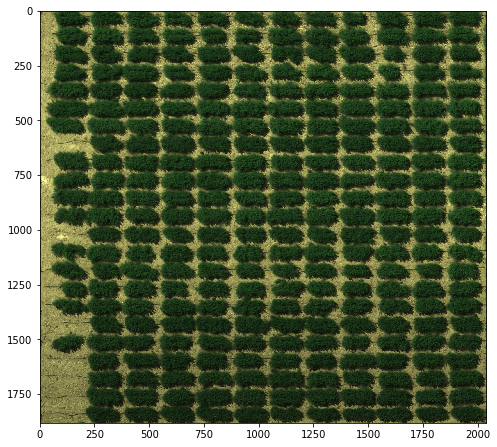

In [3]:
# inspect the input image
img = mpimg.imread('GRID_raw.png')
plt.figure(figsize=(8, 8))
plt.imshow(img)

In [4]:
# inspect the tabular output
dt = pd.read_csv("GRID_data.csv"); dt

,var,row,col,area_all,area_veg,NDVI,NDVI_std,GNDVI,GNDVI_std,CNDVI,...,ch_2,ch_2_std,ch_3,ch_3_std,ch_4,ch_4_std,ch_5,ch_5_std,ch_6,ch_6_std
0,unnamed_0,1,1,14910,6205,0.680722,0.101848,0.481553,0.086146,0.955003,...,59.423529,15.689919,26.239484,8.893769,167.117808,21.852656,69.889927,10.829972,30.540088,24.633806
1,unnamed_23,1,2,10251,6074,0.676454,0.094532,0.475063,0.077119,0.942506,...,59.718966,14.534593,26.431841,8.389850,165.603721,20.710229,69.595324,9.956617,26.050244,23.631348
2,unnamed_46,1,3,12996,8037,0.679914,0.089733,0.474278,0.074406,0.944246,...,60.750404,14.811752,26.750280,8.541490,167.954585,21.471309,69.989051,10.539928,31.216141,24.766432
3,unnamed_69,1,4,11100,5435,0.643977,0.114235,0.442635,0.088716,0.879109,...,65.185097,15.769556,28.936155,9.405345,166.668813,21.403908,68.871757,10.314017,20.444095,21.586253
4,unnamed_92,1,5,12506,5645,0.659209,0.118899,0.460301,0.092747,0.913120,...,62.443933,16.140226,27.421612,9.592832,166.453853,19.131734,69.195748,9.295681,17.890222,21.159997
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271,unnamed_183,23,8,13851,6455,0.743537,0.114225,0.598427,0.093205,1.154553,...,44.106274,12.926948,20.407901,8.120920,173.637180,21.825689,72.545778,11.594452,38.396902,19.955167
272,unnamed_206,23,9,12877,6293,0.735538,0.113924,0.594051,0.090958,1.140933,...,44.571746,13.482742,21.143334,8.533524,172.578738,20.879160,72.617670,11.297813,34.843954,19.919131
273,unnamed_229,23,10,12880,7028,0.751853,0.099948,0.605144,0.079713,1.168800,...,43.526323,11.750768,20.231929,7.710727,175.287137,22.499670,74.050370,12.060664,40.409932,21.961529
274,unnamed_252,23,11,13122,6433,0.734485,0.123072,0.590896,0.098009,1.137487,...,45.554018,14.221262,21.560547,9.116043,174.559304,22.556524,73.487331,12.153618,44.907508,16.025357


In [5]:
# subset columns of canopy area, NDVI, and spectral signals
dt_idx = dt[["area_veg", "NDVI"] + ["ch_%d" % i for i in range(1, 7)]].dropna(); dt_idx

,area_veg,NDVI,ch_1,ch_2,ch_3,ch_4,ch_5,ch_6
0,6205,0.680722,32.572442,59.423529,26.239484,167.117808,69.889927,30.540088
1,6074,0.676454,32.683240,59.718966,26.431841,165.603721,69.595324,26.050244
2,8037,0.679914,32.748165,60.750404,26.750280,167.954585,69.989051,31.216141
3,5435,0.643977,36.915731,65.185097,28.936155,166.668813,68.871757,20.444095
4,5645,0.659209,35.175554,62.443933,27.421612,166.453853,69.195748,17.890222
...,...,...,...,...,...,...,...,...
271,6455,0.743537,26.120372,44.106274,20.407901,173.637180,72.545778,38.396902
272,6293,0.735538,27.076593,44.571746,21.143334,172.578738,72.617670,34.843954
273,7028,0.751853,25.338788,43.526323,20.231929,175.287137,74.050370,40.409932
274,6433,0.734485,27.561324,45.554018,21.560547,174.559304,73.487331,44.907508


### Design index formulas

In [6]:
# make a dictionary of formulas
# where x0 and x1 stand for channel signals from two different (same) columns
ls_formula = {"(x0 - x1) / (x0 + x1)": lambda x0, x1: (x0 - x1) / (x0 + x1),
              "x0 / x1":               lambda x0, x1: x0 / x1,
              "(x0 ^ 2) + (x1 ^ 2)":   lambda x0, x1: (x0 ** 2) + (x1 ** 2)}

### Compute correlations
We can compute Pearson's correlation coefficients between the canopy areas and our derived indices

In [7]:
# instantiate pandas dataframe
dt_results = pd.DataFrame(columns=["x0", "x1", "formula", "r2"])

# define the loop
cols_ignored = 2  # we won't loop over the first 2 columns, which are canopy and NDVI
p = 6  # number of channels we'd like to loop over

# pairwise iterate through 6 spectral bands 
for i in range(p):
    for j in range(p):
        # get band signals and store them in x0 and x1
        x0 = dt_idx.iloc[:, cols_ignored + i]
        x1 = dt_idx.iloc[:, cols_ignored + j]
        
        # compute 3 indices from x0 and x1
        ls_idx = [list(ls_formula.values())[i](x0, x1) for i in range(3)]
        
        # store results into a temporary dataframe
        dt_temp = pd.DataFrame({
            "x0":      i,
            "x1":      j,
            "formula": list(ls_formula.keys()),
            "r":       [pearsonr(dt_idx["area_veg"], ls_idx[i])[0]
                        for i in range(3)],
            "r2":      [pearsonr(dt_idx["area_veg"], ls_idx[i])[0] ** 2
                        for i in range(3)]
        })
        
        # append our result dataframe
        dt_results = dt_results.append(dt_temp)
        

/Users/jameschen/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())


In [8]:
# handle results from zero division error
dt_results.loc[dt_results.r2.isna(), ["r2", "r"]] = 0
dt_results

,x0,x1,formula,r2,r
0,0,0,(x0 - x1) / (x0 + x1),0.000000,0.000000
1,0,0,x0 / x1,0.000000,0.000000
2,0,0,(x0 ^ 2) + (x1 ^ 2),0.230163,-0.479753
0,0,1,(x0 - x1) / (x0 + x1),0.124206,-0.352429
1,0,1,x0 / x1,0.134024,-0.366092
...,...,...,...,...,...
1,5,4,x0 / x1,0.010826,0.104048
2,5,4,(x0 ^ 2) + (x1 ^ 2),0.050595,0.224933
0,5,5,(x0 - x1) / (x0 + x1),0.000000,0.000000
1,5,5,x0 / x1,0.000000,0.000000


### Heatmaps of correlations
This visualization can show how derived indices associate with canopy areas

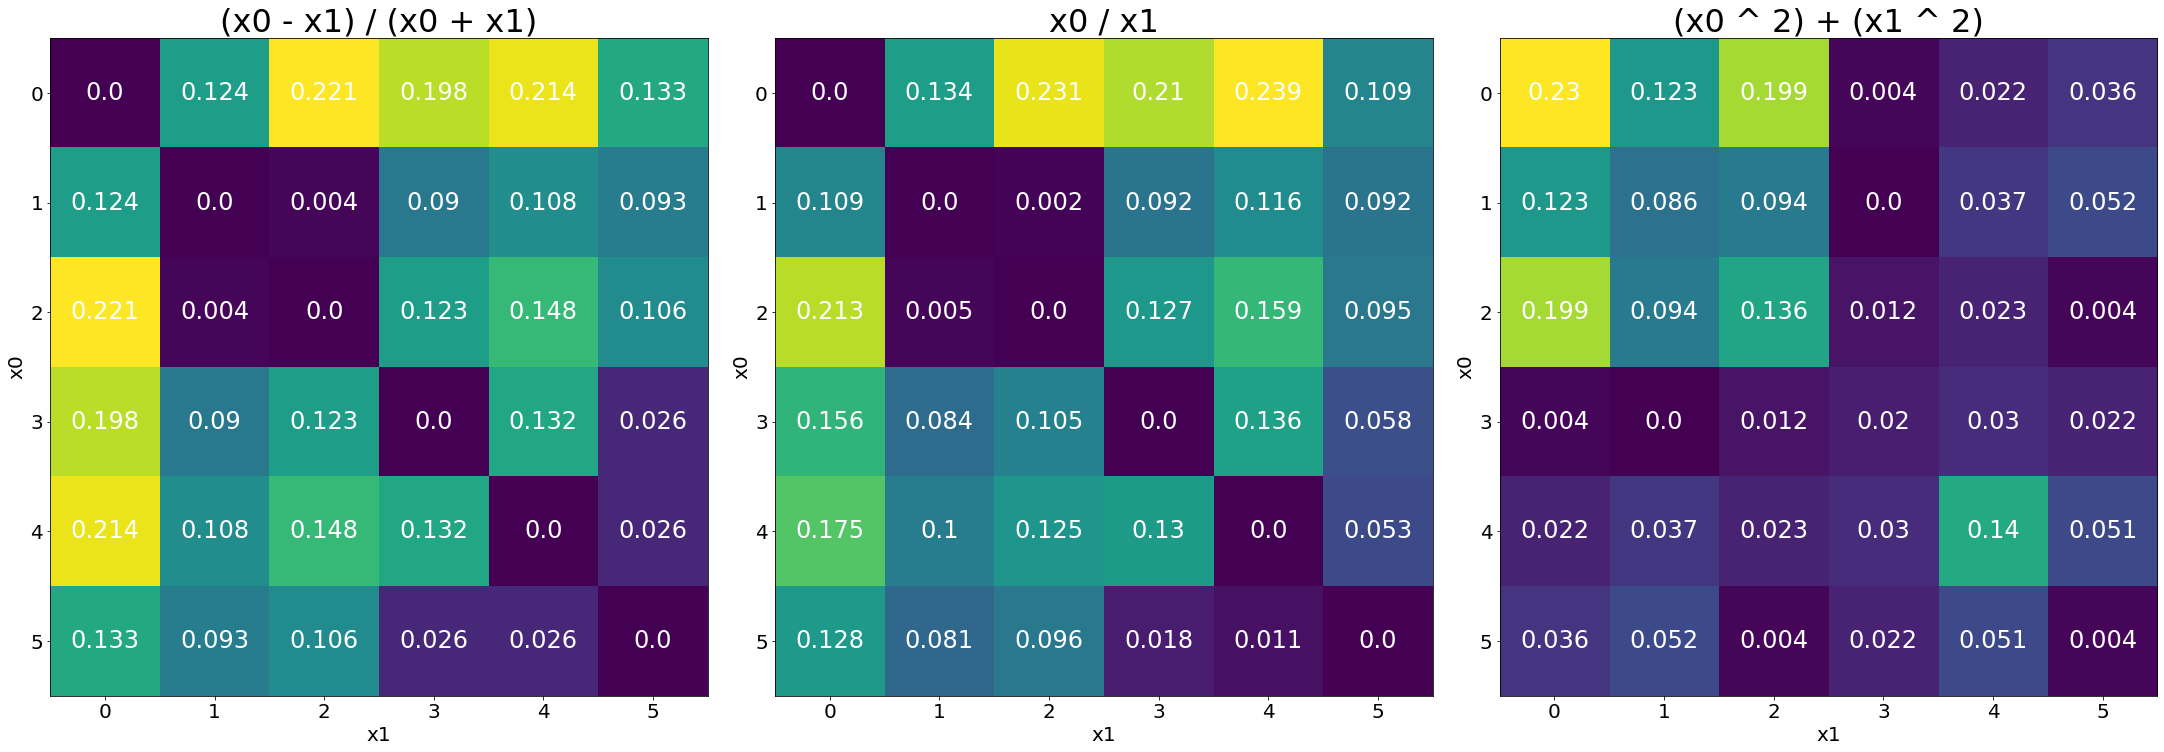

In [9]:
# define font size
size_title = 32
size_label = 24
size_tick  = 20

# generate 3 heatmaps for each formula
fig, axes = plt.subplots(1, 3, figsize=(30, 10), constrained_layout=True)
for i in range(3):
    # get r2 values by each formula
    formula = list(ls_formula.keys())[i]
    ls_r2 = dt_results.loc[dt_results.formula == formula, "r2"]
    
    # reshape the list to a 2D matrix
    M = np.array(ls_r2).reshape((p, p))
    
    # plot interface
    axes[i].set_title(list(ls_formula.keys())[i], fontsize=size_title)
    axes[i].set_xlabel("x1", fontsize=size_tick)
    axes[i].set_ylabel("x0", fontsize=size_tick)
    for x0 in range(p):
        for x1 in range(p):
            text = axes[i].text(x0, x1, round(M[x1, x0], 3),
                            ha="center", va="center", color="w", fontsize=size_label)
    plt.sca(axes[i])
    plt.xticks(ticks=np.arange(p), fontsize=size_tick)
    plt.yticks(ticks=np.arange(p), fontsize=size_tick)
    
    # show heatmap
    axes[i].imshow(M)

### Tabular Results of selected indices
Also we can inspect which indices perform bettern than NDVI in a dataframe

In [10]:
# compute correlation between NDVI and canopy area
r2_ndvi = pearsonr(dt_idx["area_veg"], dt_idx["NDVI"])[0] ** 2
r2_ndvi

0.1975636107759065

In [11]:
# extract rows containing better indices
dt_results.loc[dt_results.r2 > r2_ndvi].sort_values(by="r2", ascending=False)

,x0,x1,formula,r2,r
1,0,4,x0 / x1,0.238634,-0.488502
1,0,2,x0 / x1,0.230562,-0.480169
2,0,0,(x0 ^ 2) + (x1 ^ 2),0.230163,-0.479753
0,0,2,(x0 - x1) / (x0 + x1),0.220862,-0.469959
0,2,0,(x0 - x1) / (x0 + x1),0.220862,0.469959
0,0,4,(x0 - x1) / (x0 + x1),0.214008,-0.462610
0,4,0,(x0 - x1) / (x0 + x1),0.214008,0.462610
1,2,0,x0 / x1,0.213051,0.461574
1,0,3,x0 / x1,0.209906,-0.458155
2,0,2,(x0 ^ 2) + (x1 ^ 2),0.199044,-0.446143


### Validate the index
Based on the results shown above, now we know that by dividing the 1st channel by the 5th channel can derive a canopy-tracking index. we can validate this result by visualize the index as an image.  

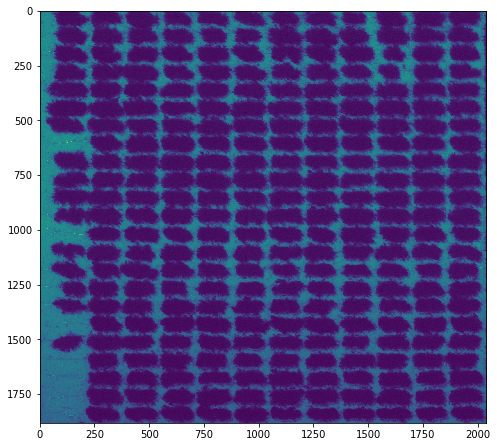

In [12]:
img = np.load("GRID_image.npy")
img_idx = img[:, :, 0] / (img[:, :, 4] + 1e-9) # adding 1e-9 to prevent zero division error
plt.figure(figsize=(8, 8))
plt.imshow(img_idx)

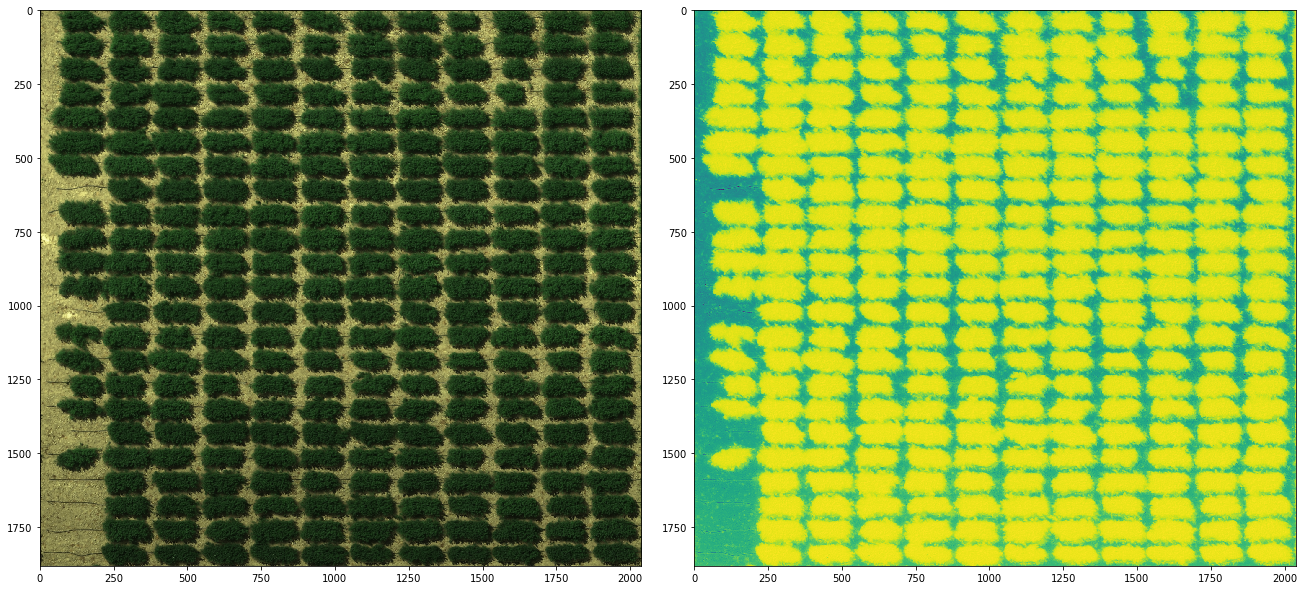

In [13]:
# as we see the negative correlation, we can flip the values and visualize it again
img_idx_flip = abs(img_idx - img_idx.max())

# and we can compare the result with the RGB image
fig, axes = plt.subplots(1, 2, figsize=(18, 8), constrained_layout=True)
axes[0].imshow(img[:, :, :3])
axes[1].imshow(img_idx_flip)